# DS 3000 - Practicum 3

**Student Name**: Julian Leonhardt, Vijay Sherring, Haozhe Zhu, Alysha Advani

**Date**: 4/13/25

## Question 1- The DS Problem
- In your own words, formulate the Data Science problem

We are tasked with looking at data called the "CDC Diabetes Health Indicators." From this data, we will classify the target variables that indicate whether the patient is diabetic, pre-diabetic, or healthy. The variables in question include various influences affecting diabetes, such as age, location, race, etc. The data we will use was obtained from the Behavioral Risk Factor Surveillance System (BRFSS). The point of BRFSS is to collect data on a wide range of different health factors; today, we will be looking at diabetes, as the CDC estimates that millions of Americans are either unaware that they have diabetes or are pre-diabetic.  

## Question 2- Prepare the Data

- Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.

- Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis.

In [ ]:
import pandas as pd

# Load the data into the document
diabetes_df = pd.read_csv("/content/diabetes_012_health_indicators_BRFSS2015.csv")

# Checking the types of variables
diabetes_df.head(), diabetes_df.dtypes

(   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
 0                   0.0           0.0     0.0  ...            1.0   
 1                   0.0           1.0     0.0  ...            0.0   
 2                   0.0           0.0     1.0  ...            1.0   
 3                   0.0           1.0     1.0  ...            1.0   
 4                   0.0           1.0     1.0  ...            1.0   
 
    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
 0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

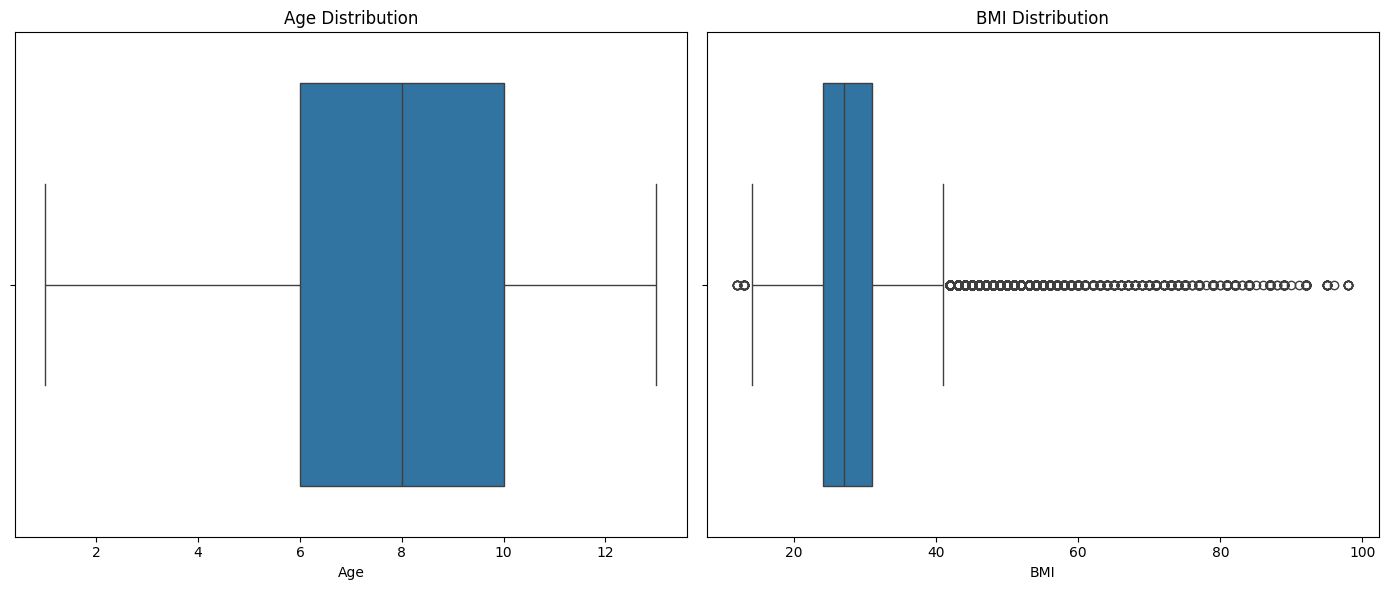

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(14, 6))
sns.boxplot(x=diabetes_df['Age'], ax=axes[0])
sns.boxplot(x=diabetes_df['BMI'], ax=axes[1])

axes[0].set_title('Age Distribution')
axes[1].set_title('BMI Distribution')

plt.tight_layout()
plt.show()


## Analysis of distribution

Here we are checking for invalid values: For the age distribution, there appear to be some outliers, which we can tell from the long tails in the boxplot. However, no extreme values fall out of the normal range. There also seem to be very few outliers for the BMI distribution, but the main distribution falls within a reasonable range. As BMI is a measure base on the persons weight and height outliers are expected when dealing with this kind of data.  



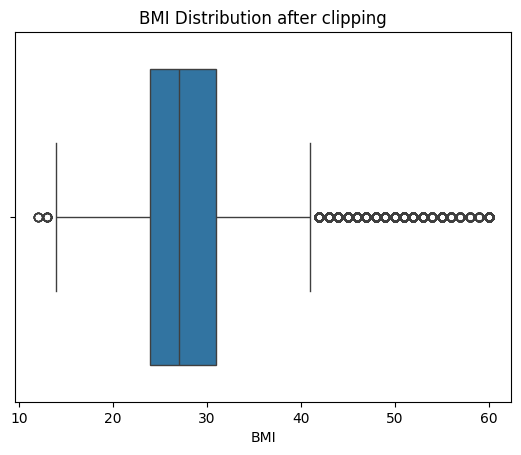

,0
Diabetes_012,category
HighBP,category
HighChol,category
CholCheck,category
BMI,float64
Smoker,category
Stroke,category
HeartDiseaseorAttack,category
PhysActivity,category
Fruits,category


In [ ]:
# Clipping the outliers
diabetes_df['BMI'] = diabetes_df['BMI'].clip(lower=10, upper=60)

sns.boxplot(x = diabetes_df['BMI'])
plt.title('BMI Distribution after clipping')
plt.show()

# Change all of the necessary types to categorical
categorical_columns = [
    'Sex', 'Education', 'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk'
]

diabetes_df[categorical_columns] = diabetes_df[categorical_columns].apply(lambda x: x.astype('category'))


diabetes_df.dtypes




## Analysis of type changes
Here, we are changing all of the types that need to be changed. After looking at the documentation, the data labeled "binary" could be switched to categorical, while the ones labeled "Integer" can be left as they were imported.

For the outliers on BMI, we researched the standard range of BMI and what numbers were acceptable and found the range to be 10-60, so with that being said, we snipped all of the outliers that did not belong, as those would affect our data.


## Question 3
- Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results. This is a 20pt question and requires detailed analyses and visualizations.

1. First we want to analyze the distribution of the Diabetes_012 variable, which is understood to be the target. By looking at this,s we can understand the distribution of diabetic, pre-diabetic, and healthy individuals


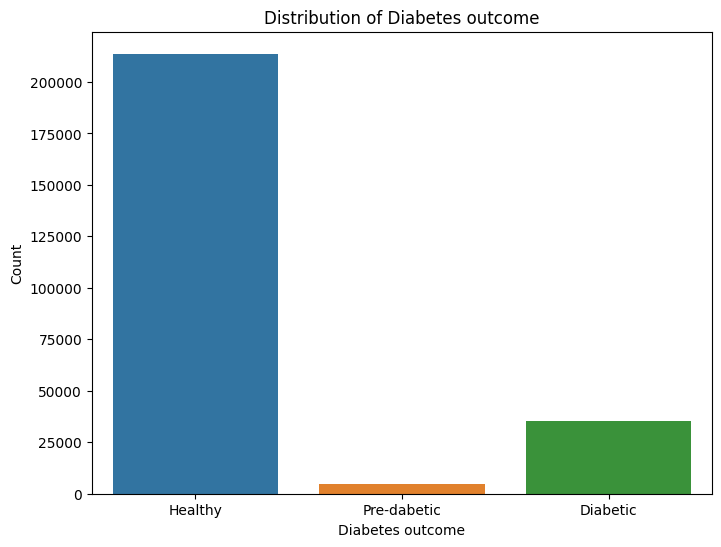

In [ ]:

plt.figure(figsize=(8,6))
# Bar plot for distribution of diabetes
sns.countplot(x='Diabetes_012', data=diabetes_df, hue='Diabetes_012', legend=False )
plt.title('Distribution of Diabetes outcome')
plt.xlabel('Diabetes outcome')
plt.ylabel('Count')
plt.xticks([0,1,2], ['Healthy', 'Pre-dabetic', 'Diabetic'])
plt.show()



The plot above shows that the distribution of Diabetes_012 is heavily skewed toward healthy individuals. Only a small number of people are pre-diabetic, and a substantial number are diabetic.



Next, we will look at the univariate analysis of continuous variables such as age and BMI and their distributions.  


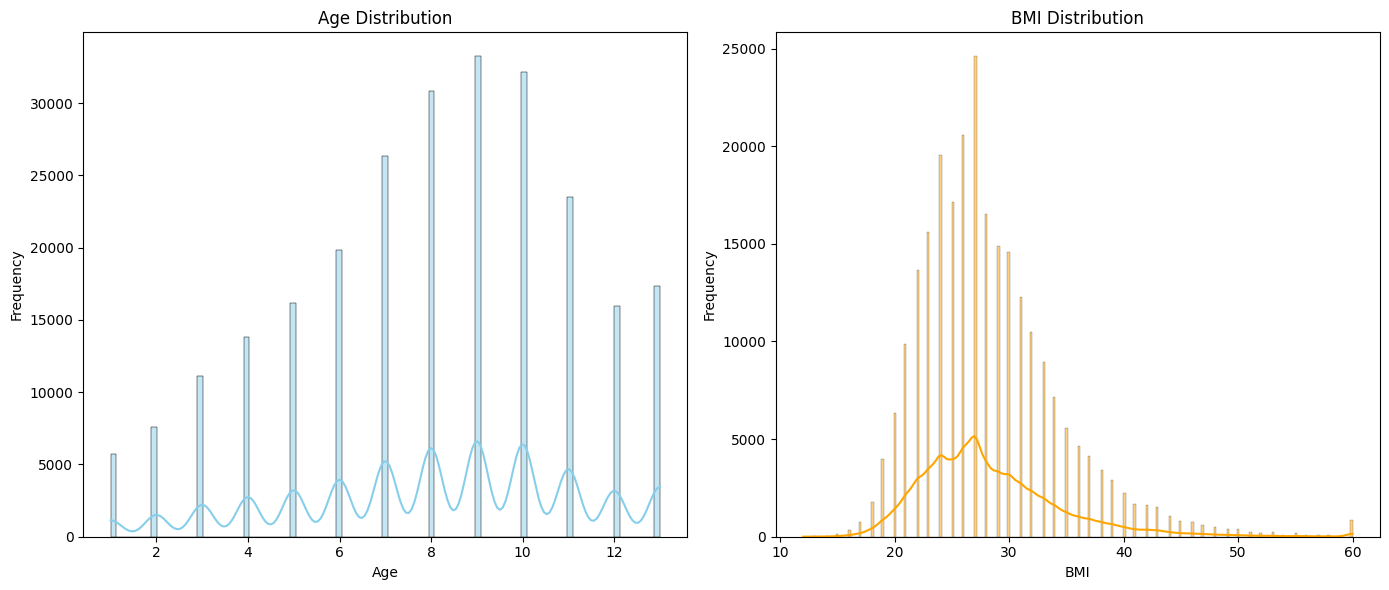

In [ ]:
# Explores the distribution of

fig, axes = plt.subplots(1,2, figsize=(14,6))

# Age distribution
sns.histplot(diabetes_df['Age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# BMI distribution
sns.histplot(diabetes_df['BMI'], kde=True, color='orange', ax=axes[1])
axes[1].set_title('BMI Distribution')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



## Analysis
Age distribution: The age distribution appears to be fairly normal with a slight skew. But as we can see that most of the data set is targeted towards younger individuals.

BMI distribution: The BMI is definitely more skewed with a peak around the middle values but also has some extreme values that are tailored towards the higher end.


## AGE AND BMI RELATE TO TARGET

We will explore how age and BMI relate to the target variable. We will seek this relationship with boxplots, which will examine how the distribution of these continuous variables differs between the categories of Healthy, Pre-diabetic, and diabetic.


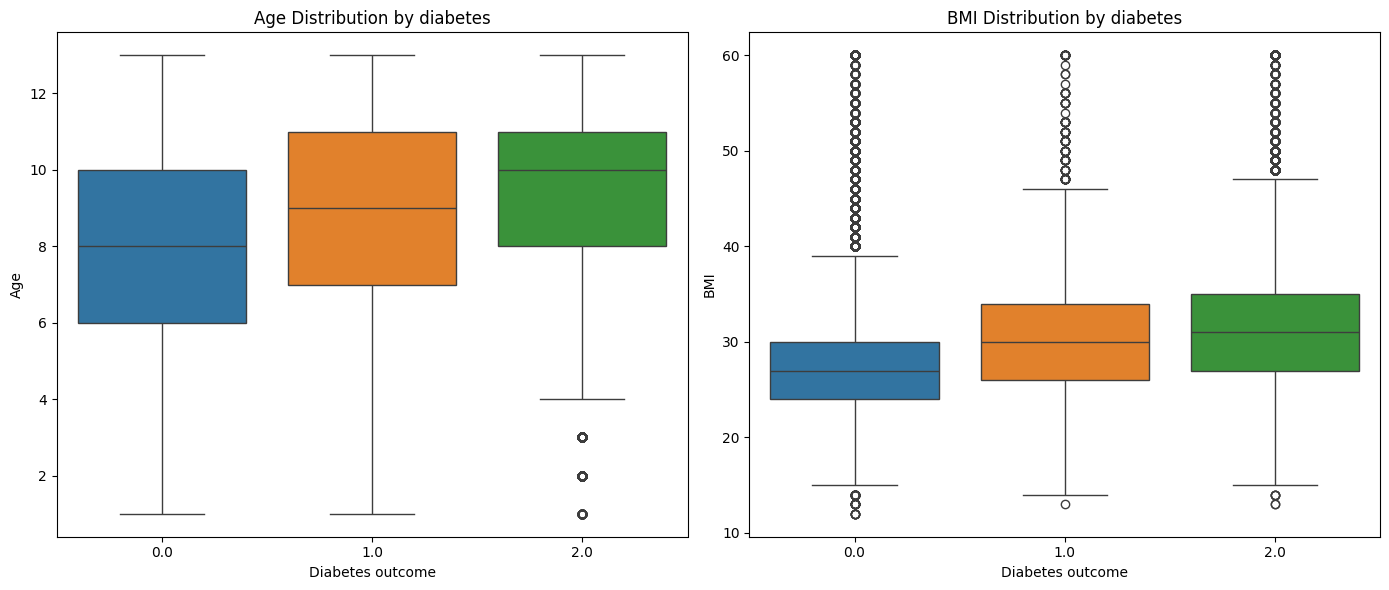

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

#Boxplot for age vs diabetes
sns.boxplot(x='Diabetes_012', y='Age', data=diabetes_df, hue='Diabetes_012', legend=False, ax=axes[0])
axes[0].set_title('Age Distribution by diabetes')
axes[0].set_xlabel('Diabetes outcome')
axes[0].set_ylabel('Age')

#Boxplot for BMI vs diabete
sns.boxplot(x='Diabetes_012', y='BMI', data=diabetes_df, hue='Diabetes_012', legend=False, ax=axes[1])
axes[1].set_title('BMI Distribution by diabetes')
axes[1].set_xlabel('Diabetes outcome')
axes[1].set_ylabel('BMI')


plt.tight_layout()
plt.show()



## Analysis

Age Vs Diabetes outcome: The age distribution shows a clear difference between the groups. Diabetic individuals tend to be older, with a higher median age. Healthier folks tend to be more concentrated around the younger ages and pre-diabetic individuals apper to have a broader age range, overlapping with both diabetic and healthy individuals.

BMI vs. Diabetes: Diabetic people tend to have a higher BMI than healthier people, which is expected. Pre-diabetic people tend to have a BMI that overlaps with that of both healthy and diabetic people, and healthy individuals tend to have a lower BMI.

Next, we are gonna look at categorical variables and move away from continous. For the following we are gonna look at Sex, smoker, and PhysActivity and how they relate to the target variable.  

Text(0, 0.5, 'Count')

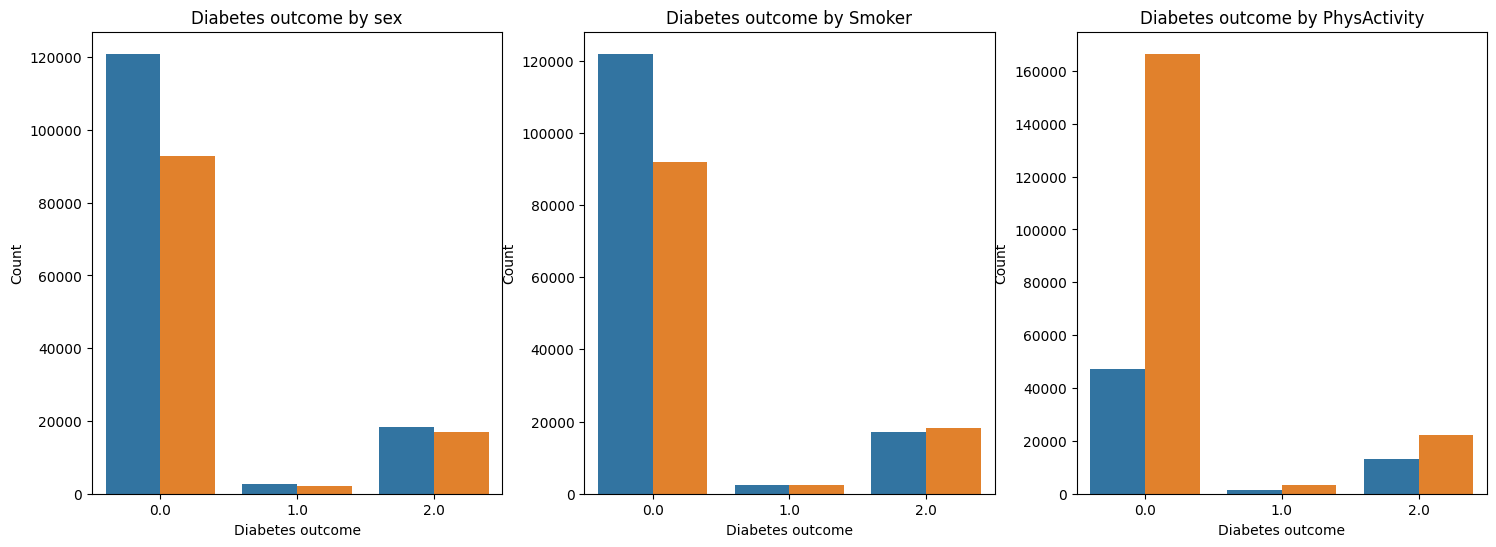

In [ ]:

fig, axes = plt.subplots(1,3, figsize=(18,6))

#bar plot for sex vs diabetes
sns.countplot(x='Diabetes_012', hue='Sex', data=diabetes_df, legend=False, ax=axes[0])
axes[0].set_title('Diabetes outcome by sex')
axes[0].set_xlabel('Diabetes outcome')
axes[0].set_ylabel('Count')

#bar plot for Smoker vs diabetes
sns.countplot(x='Diabetes_012', hue='Smoker', data=diabetes_df, legend=False, ax=axes[1])
axes[1].set_title('Diabetes outcome by Smoker')
axes[1].set_xlabel('Diabetes outcome')
axes[1].set_ylabel('Count')

#bar plot for PhysActivity vs diabetes
sns.countplot(x='Diabetes_012', hue='PhysActivity', data=diabetes_df, legend=False, ax=axes[2])
axes[2].set_title('Diabetes outcome by PhysActivity')
axes[2].set_xlabel('Diabetes outcome')
axes[2].set_ylabel('Count')




## Analysis
Sex vs disbetes outcome: The distribution across sex categories are similar, but we can see a slight difference. For example the diabetic group has a pretty even distribution between sexs, while there are slightly more healthy males then females.

Smoker vs diabetes outcome: The general take away is that smokers are more likly to be diabetic compared to non-smokers. Even in the pre-diabetic this is a noticable amount of smokers.

Physical movement vs diabetes: As expected the healthier folks tend to be more physically active than not. But we also see an intresting trend where the diabetic also tend to have more people who are physically active then not.

Now we will preform a correlation analysis to identify how stronly the countinous features are actually related to the target variable. We will be using a heat map for this are is will be helpful to visualize these correlations.


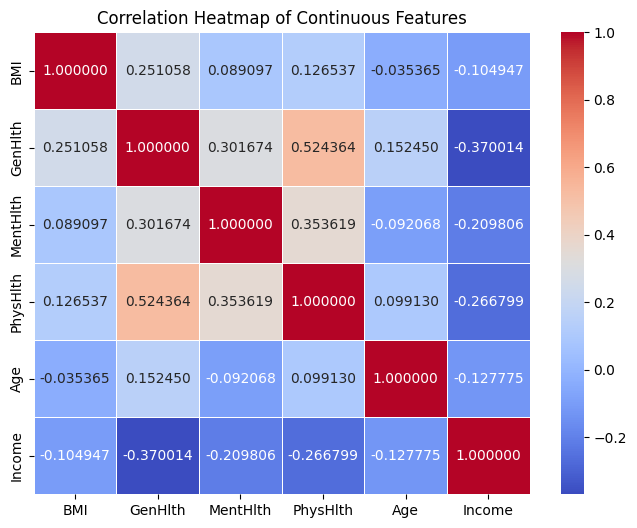

In [ ]:
# Correlation matrix for continous vars
countinuous_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']

# Calc the matrix
correlation_matrix = diabetes_df[countinuous_features].corr()

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='2f', linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Features')
plt.show()



## Analysis

There is a strong postive correlation between GenHealth and Physical health which makes sense are those two should be correlated. There is a pretty strong negitive correlation between GenHealth and income which is an unfortunate truth that income often times dicates how healthy a person can become. The rest of the correlations are pretty modest and aren't able to tell us too much.

Key Findings from the EDA:
1. The target vairable(Diabetes_012): It seems that the majority of people within the dataset are healthy people, with a smaller sub group being pre-diabetic and diabetic.
2. Age and BMI: The older the age and the higher the BMI are strongly correlated with being diabetic. These variables could be important when looking at target vairble classification
3. Smoker and health: Smokers then to have higher rates of diabetee compared to those who do not smoke, highlighting the negative healthy impact of smoking.
4. There is a clear relationship between the income of indiviuals and their overall health, meaning that income could also be an indicator of diabetes.


## Question 4a:
- Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.

- Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.
Note: if you are using correlations, ensure that this is only performed using continuous variables.

In [ ]:
from scipy.stats import ttest_ind

# Subsets for Healthy (0) and Diabetic (2)
healthy = diabetes_df[diabetes_df['Diabetes_012'] == 0]
diabetic = diabetes_df[diabetes_df['Diabetes_012'] == 2]

# 1. Age comparison
t_stat_age, p_val_age = ttest_ind(healthy['Age'], diabetic['Age'], equal_var=False)
print("T-Test: Age between Healthy and Diabetic")
print(f"P-value: {p_val_age:.4e}")
print("→", "Significant difference\n" if p_val_age < 0.05 else "No significant difference\n")


T-Test: Age between Healthy and Diabetic
P-value: 0.0000e+00
→ Significant difference



In [ ]:
# 2. BMI comparison
t_stat_bmi, p_val_bmi = ttest_ind(healthy['BMI'], diabetic['BMI'], equal_var=False)
print("T-Test: BMI between Healthy and Diabetic")
print(f"P-value: {p_val_bmi:.4e}")
print("→", "Significant difference\n" if p_val_bmi < 0.05 else "No significant difference\n")

T-Test: BMI between Healthy and Diabetic
P-value: 0.0000e+00
→ Significant difference



In [ ]:
# 3. Physical Activity comparison
t_stat_pa, p_val_pa = ttest_ind(healthy['PhysActivity'], diabetic['PhysActivity'], equal_var=False)
print("T-Test: Physical Activity between Healthy and Diabetic")
print(f"P-value: {p_val_pa:.4e}")
print("→", "Significant difference\n" if p_val_pa < 0.05 else "No significant difference\n")

T-Test: Physical Activity between Healthy and Diabetic
P-value: 0.0000e+00
→ Significant difference



In [ ]:
binary_features = [
    'HighBP', 'HighChol', 'PhysActivity', 'HeartDiseaseorAttack',
    'Smoker', 'DiffWalk', 'Fruits', 'Veggies'
]

# Subset groups
healthy = diabetes_df[diabetes_df['Diabetes_012'] == 0]
diabetic = diabetes_df[diabetes_df['Diabetes_012'] == 2]

# Run t-tests for each binary feature
print("T-Tests (Healthy vs Diabetic):\n")
for feature in binary_features:
    stat, p = ttest_ind(healthy[feature], diabetic[feature], equal_var=False)
    print(f" P-value: {p:.4e} | {'Significant' if p < 0.05 else 'Not significant'}")

T-Tests (Healthy vs Diabetic):

 P-value: 0.0000e+00 | Significant
 P-value: 0.0000e+00 | Significant
 P-value: 0.0000e+00 | Significant
 P-value: 0.0000e+00 | Significant
 P-value: 1.3835e-207 | Significant
 P-value: 0.0000e+00 | Significant
 P-value: 2.0932e-92 | Significant
 P-value: 1.0877e-156 | Significant


## Question 5:
- Partition the data into train/test sets. After which, perform the following:

  - encode any categorical data. Ensure that categorical variables are represented correctly.
  - normalize numeric data.
  
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target
selected_features = [
    'Age', 'BMI', 'GenHlth', 'PhysHlth',
    'HighBP', 'HighChol', 'PhysActivity',
    'HeartDiseaseorAttack', 'Smoker', 'DiffWalk',
    'Fruits', 'Veggies', 'Education', 'Income'
]

X = diabetes_df[selected_features]
y = diabetes_df['Diabetes_012']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalize numeric features (fit on train, transform on test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Question 6:
- Build the ML model that predicts the target variable based on the selected features. Ensure that you:
  - Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
  - Use GridSearchCV to tune at least two hyperparameters for each algorithm.
  - Note: do not change the input features in your experiments.

I choose k-neighbors Classification, CART as first two algorithms for training model. This is because these two algorithms perfectly fit the requirement of handle non-linear data and accept multiple input features. The choice of third algorithm will be discussed later.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [ ]:
# default kNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("="*40)
print("k-NN result")
print("="*40)
print(f"balenced accuracy: {balanced_accuracy_score(y_test, y_pred_knn):.4f}")
print("classification_report:")
print(classification_report(y_test, y_pred_knn, target_names=['Healthy', 'Prediabetic', 'Diabetic']))

k-NN result
balenced accuracy: 0.3880
classification_report:
              precision    recall  f1-score   support

     Healthy       0.86      0.95      0.91     42741
 Prediabetic       0.02      0.00      0.00       926
    Diabetic       0.41      0.21      0.28      7069

    accuracy                           0.83     50736
   macro avg       0.43      0.39      0.40     50736
weighted avg       0.79      0.83      0.80     50736



In [ ]:
# default CART
cart = DecisionTreeClassifier(random_state=42)
cart.fit(X_train_scaled, y_train)
y_pred_cart = cart.predict(X_test_scaled)

print("="*40)
print("CART result")
print("="*40)
print(f"balanced accuracy: {balanced_accuracy_score(y_test, y_pred_cart):.4f}")
print("classification report:")
print(classification_report(y_test, y_pred_cart, target_names=['Healthy', 'Prediabetic', 'Diabetic']))


CART result
balanced accuracy: 0.4016
classification report:
              precision    recall  f1-score   support

     Healthy       0.87      0.87      0.87     42741
 Prediabetic       0.03      0.03      0.03       926
    Diabetic       0.30      0.30      0.30      7069

    accuracy                           0.77     50736
   macro avg       0.40      0.40      0.40     50736
weighted avg       0.78      0.77      0.78     50736



In [ ]:
# 1. k-NN tune
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7],  # Use odd number to avoid tie
    'weights': ['uniform', 'distance'],
}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='balanced_accuracy', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)
print("k-NN Best Params:", knn_grid.best_params_)

k-NN Best Params: {'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
# 2. CART tune
tree = DecisionTreeClassifier(random_state=42)
tree_params = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [10, 20, 30],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}
tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='balanced_accuracy', n_jobs=-1)
tree_grid.fit(X_train, y_train)
print("Tree Best Params:", tree_grid.best_params_)

Tree Best Params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}


In [ ]:
# a method for evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.3f}")
    print(classification_report(y_test, y_pred, target_names=['Healthy', 'Prediabetic', 'Diabetic'], zero_division=0))
    print("R2 score: ", r2_score(y_test, y_pred))
    print("MSE: ", mean_squared_error(y_test, y_pred))
    print("MAE: ", mean_absolute_error(y_test, y_pred))

In [ ]:
tun_knn_result = evaluate_model(knn_grid.best_estimator_, X_test_scaled, y_test)
tun_knn_result

Balanced Accuracy: 0.396
              precision    recall  f1-score   support

     Healthy       0.87      0.92      0.89     42741
 Prediabetic       0.03      0.01      0.02       926
    Diabetic       0.35      0.26      0.30      7069

    accuracy                           0.81     50736
   macro avg       0.41      0.40      0.40     50736
weighted avg       0.78      0.81      0.79     50736

R2 score:  -0.41418971188133114
MSE:  0.6892935982339956
MAE:  0.3580100914538001


In [ ]:
tun_cart_result = evaluate_model(tree_grid.best_estimator_, X_test, y_test)
tun_cart_result

Balanced Accuracy: 0.497
              precision    recall  f1-score   support

     Healthy       0.95      0.60      0.73     42741
 Prediabetic       0.02      0.26      0.05       926
    Diabetic       0.32      0.63      0.42      7069

    accuracy                           0.59     50736
   macro avg       0.43      0.50      0.40     50736
weighted avg       0.85      0.59      0.68     50736

R2 score:  -1.065440006684283
MSE:  1.0067210659098076
MAE:  0.6057434563229265


There are many options for the third algorithms. Considering our train datasets. We have approximate 200,000 input train data. Without the help of GPU, SVM will take a long time to train. Same as the gridsearch of hyperparameters. Thus, I think of model like logistic regression and Navie Bayes algorithms. However, these two algorithms cannot directly handle non-linear data. Thus, some modification is requried.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
# generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(X_train_poly.shape[1])

119


In [ ]:
# initialization
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_poly, y_train)

y_pred_logreg = logreg.predict(X_test_poly)

print("="*40)
print("default logistic result")
print("="*40)
print(f"balanced accuracy: {balanced_accuracy_score(y_test, y_pred_logreg):.4f}")
print(classification_report(
    y_test, y_pred_logreg,
    target_names=['Healthy', 'Prediabetic', 'Diabetic'],
    zero_division=0
))

default logistic result
balanced accuracy: 0.3832
              precision    recall  f1-score   support

     Healthy       0.86      0.98      0.92     42741
 Prediabetic       0.00      0.00      0.00       926
    Diabetic       0.55      0.17      0.26      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



Then we try default Naive Bayes algorithm. Since most of our features are linear, we choose Gaussian Naive Bayes. We need to handle non linear data.

In [ ]:
# initialize gnb
gnb = GaussianNB()
gnb.fit(X_train_poly, y_train)


y_pred_gnb = gnb.predict(X_test_poly)

print("="*40)
print("GNB result")
print("="*40)
print(f"balanced accuracy: {balanced_accuracy_score(y_test, y_pred_gnb):.4f}")
print(classification_report(
    y_test, y_pred_gnb,
    target_names=['Healthy', 'Prediabetic', 'Diabetic'],
    zero_division=0
))

GNB result
balanced accuracy: 0.4432
              precision    recall  f1-score   support

     Healthy       0.89      0.82      0.86     42741
 Prediabetic       0.03      0.07      0.04       926
    Diabetic       0.33      0.44      0.38      7069

    accuracy                           0.75     50736
   macro avg       0.42      0.44      0.43     50736
weighted avg       0.80      0.75      0.77     50736



After that we tune these two models.

In [ ]:
# logistic regression tune
# initialization
logreg = LogisticRegression(random_state=42, max_iter=1000)

# setup grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# create grid search
logreg_grid = GridSearchCV(logreg, param_grid, cv=5, scoring='balanced_accuracy')
logreg_grid.fit(X_train_poly, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='balanced_accuracy')

In [ ]:
logreg_grid.best_params_

{'C': 1, 'penalty': 'l2'}

In [ ]:
tun_logreg_result = evaluate_model(logreg_grid.best_estimator_, X_test_poly, y_test)
tun_logreg_result

Balanced Accuracy: 0.383
              precision    recall  f1-score   support

     Healthy       0.86      0.98      0.92     42741
 Prediabetic       0.00      0.00      0.00       926
    Diabetic       0.55      0.17      0.26      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736

R2 score:  -0.13444121517553653
MSE:  0.5529407127089246
MAE:  0.2855960264900662


In [ ]:
# GNB tune
# intialization
gnb = GaussianNB()

# setup hyperparameters
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# run grid search
gnb_grid = GridSearchCV(gnb, param_grid, cv=5, scoring='balanced_accuracy')
gnb_grid.fit(X_train_poly, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='balanced_accuracy')

In [ ]:
gnb_grid.best_params_

{'var_smoothing': 1e-09}

In [ ]:
tun_gnb_result = evaluate_model(gnb_grid.best_estimator_, X_test_poly, y_test)
tun_gnb_result

Balanced Accuracy: 0.443
              precision    recall  f1-score   support

     Healthy       0.89      0.82      0.86     42741
 Prediabetic       0.03      0.07      0.04       926
    Diabetic       0.33      0.44      0.38      7069

    accuracy                           0.75     50736
   macro avg       0.42      0.44      0.43     50736
weighted avg       0.80      0.75      0.77     50736

R2 score:  -0.645938574937259
MSE:  0.8022508672343109
MAE:  0.43166587827183855


## Question 7:
- Analyze the evaluated models. For each algorithm, ensure that you:
  - Display: 1) the best model and 2) the best score that was obtained.
  - Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.
NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

From the result of q6, we can get the best performance using balanced accuracy.

In [ ]:
print("Best kNN model")
print("Best Params:", knn_grid.best_params_)
print(evaluate_model(knn_grid.best_estimator_, X_test_scaled, y_test))

Best kNN model
Best Params: {'n_neighbors': 3, 'weights': 'distance'}
Balanced Accuracy: 0.396
              precision    recall  f1-score   support

     Healthy       0.87      0.92      0.89     42741
 Prediabetic       0.03      0.01      0.02       926
    Diabetic       0.35      0.26      0.30      7069

    accuracy                           0.81     50736
   macro avg       0.41      0.40      0.40     50736
weighted avg       0.78      0.81      0.79     50736

R2 score:  -0.41418971188133114
MSE:  0.6892935982339956
MAE:  0.3580100914538001
None


In [ ]:
print("Best CART model")
print("Best Params:", tree_grid.best_params_)
print(evaluate_model(tree_grid.best_estimator_, X_test, y_test))

Best CART model
Best Params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Balanced Accuracy: 0.497
              precision    recall  f1-score   support

     Healthy       0.95      0.60      0.73     42741
 Prediabetic       0.02      0.26      0.05       926
    Diabetic       0.32      0.63      0.42      7069

    accuracy                           0.59     50736
   macro avg       0.43      0.50      0.40     50736
weighted avg       0.85      0.59      0.68     50736

R2 score:  -1.065440006684283
MSE:  1.0067210659098076
MAE:  0.6057434563229265
None


In [ ]:
print("Best logistic regression model")
print("Best Params:", logreg_grid.best_params_)
print(evaluate_model(logreg_grid.best_estimator_, X_test_poly, y_test))

Best logistic regression model
Best Params: {'C': 1, 'penalty': 'l2'}
Balanced Accuracy: 0.383
              precision    recall  f1-score   support

     Healthy       0.86      0.98      0.92     42741
 Prediabetic       0.00      0.00      0.00       926
    Diabetic       0.55      0.17      0.26      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736

R2 score:  -0.13444121517553653
MSE:  0.5529407127089246
MAE:  0.2855960264900662
None


In [ ]:
print("Best GNB model")
print("Best Params:", gnb_grid.best_params_)
print(evaluate_model(gnb_grid.best_estimator_, X_test_poly, y_test))

Best GNB model
Best Params: {'var_smoothing': 1e-09}
Balanced Accuracy: 0.443
              precision    recall  f1-score   support

     Healthy       0.89      0.82      0.86     42741
 Prediabetic       0.03      0.07      0.04       926
    Diabetic       0.33      0.44      0.38      7069

    accuracy                           0.75     50736
   macro avg       0.42      0.44      0.43     50736
weighted avg       0.80      0.75      0.77     50736

R2 score:  -0.645938574937259
MSE:  0.8022508672343109
MAE:  0.43166587827183855
None


From the result above, we can see four models have their own highlights.

### Performance of each model

CART Model:
If you aim for overall balance—where each category receives reasonable attention—the CART model seems promising due to its highest balanced accuracy of 0.497. Its aggressive recall for the Diabetic class (63%) means it is more effective at identifying diabetic patients. However, a downside is that its recall for the Healthy class is somewhat lower, which may lead to some healthy individuals being misclassified as diseased.

Logistic Regression Model:
While Logistic Regression reports a high overall accuracy (85%) and nearly perfect performance in classifying Healthy individuals, its complete failure in capturing Prediabetic cases and its very poor performance for the Diabetic class undermine its utility for disease detection purposes. Therefore, despite its strong performance for one category, it does not offer a balanced solution for the entire problem.

Gaussian Naive Bayes (GNB):
GNB demonstrates a more balanced performance overall when compared to Logistic Regression, achieving moderate results for both Healthy and Diabetic classes. However, like the other models, it falls short in detecting Prediabetic cases.

kNN Model:
The kNN model shows robust performance in classifying Healthy individuals, but its predictions for the minority classes (Prediabetic and Diabetic) are severely lacking, making it less ideal when comprehensive disease detection is necessary.

### Conclusion

For detecting Diabetic patients:
If your primary objective is to ensure that diabetic patients are identified as accurately as possible—even at the cost of mistakenly classifying some healthy individuals—the CART model demonstrates a competitive advantage, particularly with its high recall in the Diabetic category.

For confirming healthy individuals:
When the focus is on accurately confirming healthy cases, Logistic Regression appears to be the most reliable choice, especially given that Healthy individuals constitute the majority of the data. However, its glaring shortcomings in detecting disease states (Prediabetic and Diabetic) mean that additional strategies, such as data resampling or class weighting, might be necessary if disease detection is crucial.

Overall Strategy:
In dealing with such an imbalanced dataset, no single conventional model seems to excel across all classes. Therefore, combining model tuning with advanced techniques—like SMOTE, adjusting sample weights, or even employing ensemble methods—could significantly enhance the identification of minority classes (especially Prediabetic).

**In summary**, if the goal is a balanced overall performance with an emphasis on capturing diabetic cases, the **CART** model is currently the best candidate. For a scenario where confirming Healthy status is of the utmost importance, **Logistic Regression** might suffice—provided that further efforts are made to address its deficiencies in predicting disease states.

## Question 8:
- Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.

- Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.

### Potential Impacts and Benefits
**Beneficiaries**:

Patients: Better screening for diabetes (both diabetic and prediabetic) can lead to earlier treatments.

Doctors and Medical Staff: More information from the model may help in decision making and prioritizing patients.

Healthcare System: Early detection may reduce costs later on by treating conditions before they become severe.

**People Affected**:

Patients misclassified: If the model does not recognize a prediabetic or diabetic patient correctly, they might not get the treatment they need.

Minority groups: If some groups (for example, based on age, gender, or race) are under-represented or if the model is biased, those patients may receive worse predictions.



### Bias in the ML Modeling
Some bias to note:

**The data we used is very imbalanced.**

**The majority of the patients are Healthy.**

**The Prediabetic and Diabetic groups have far fewer samples.**

**This imbalance means the model may favor the Healthy class and ignore or poorly predict the smaller groups.**

There could be bias if the training data has hidden differences between specific groups (for example, differences based on gender, age, or race) that are not addressed.

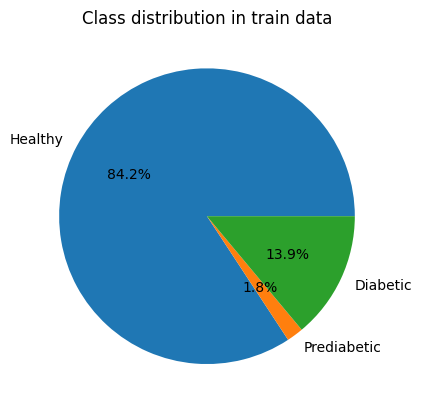

In [ ]:
plt.pie([42741, 926, 7069], labels=['Healthy', 'Prediabetic', 'Diabetic'], autopct='%1.1f%%')
plt.title('Class distribution in train data')
plt.show()

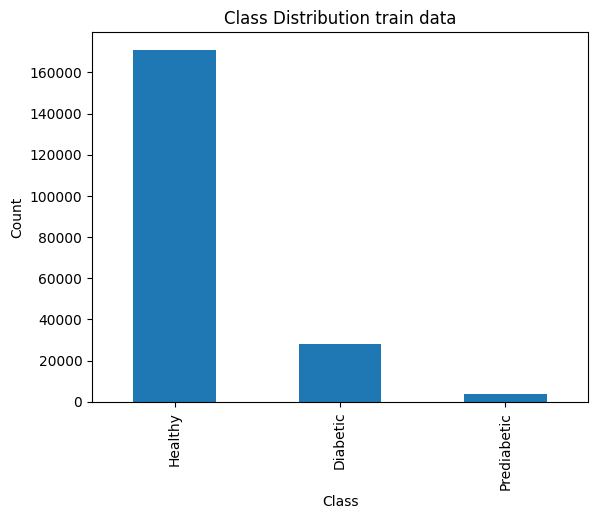

In [ ]:
counts = y_train.value_counts()
class_mapping = {0: 'Healthy', 1: 'Prediabetic', 2: 'Diabetic'}
counts.index = counts.index.map(class_mapping)

counts.plot(kind='bar')
plt.title('Class Distribution train data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Recommendation
1. add number of sample for 'diabetic' and 'prediabetic'
2. Use SVM or BalancedRandomForest that are able to handle unbalanced class or to deal with multiple features
3. Use external library like `AIF360` that can help detect and mitigate bias (https://pypi.org/project/aif360/)